# Advanced Lane Lines - Camera Calibration

In this notebook the following two points from the Project 4 Advanced Lane Lines are implemented:
* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.

---
## Step 0: Import required libraries

In [1]:
import os.path, glob
import numpy as np
import cv2
import pickle

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1:  Explore calibration images

In [2]:
calibrationImagesList = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), glob.glob('./camera_cal/c*.jpg')))

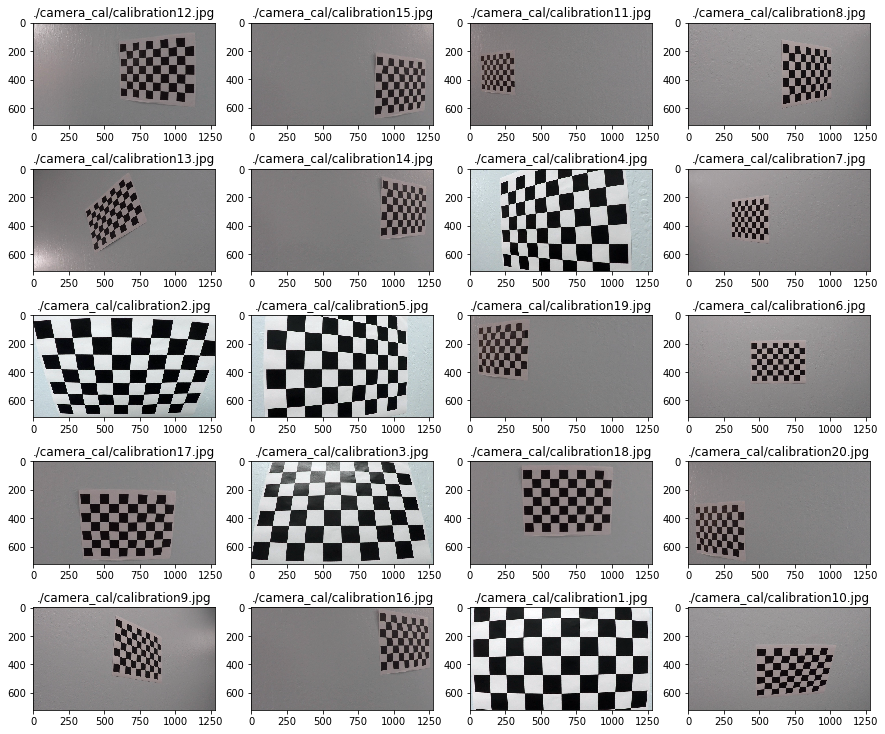

In [3]:
def displayImages(images, cols = 4, rows = 5, figsize=(15,13)):
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax, index in zip(axes.flat, indexes):
        if index < imgLength:
            imagePathName, image = images[index]
            ax.imshow(image)
            ax.set_title(imagePathName)
        
displayImages(calibrationImagesList, 4, 5, (15, 13))

## Step 2:  Calibrate Camera

Finding corners in calibration image 0
... found

Finding corners in calibration image 1
... found

Finding corners in calibration image 2
... found

Finding corners in calibration image 3
... found

Finding corners in calibration image 4
... found

Finding corners in calibration image 5
... found

Finding corners in calibration image 6
 ... NOT found

Finding corners in calibration image 7
... found

Finding corners in calibration image 8
... found

Finding corners in calibration image 9
 ... NOT found

Finding corners in calibration image 10
... found

Finding corners in calibration image 11
... found

Finding corners in calibration image 12
... found

Finding corners in calibration image 13
... found

Finding corners in calibration image 14
... found

Finding corners in calibration image 15
... found

Finding corners in calibration image 16
... found

Finding corners in calibration image 17
... found

Finding corners in calibration image 18
 ... NOT found

Finding corners in calibra

(array([[  1.15396093e+03,   0.00000000e+00,   6.69705357e+02],
        [  0.00000000e+00,   1.14802496e+03,   3.85656234e+02],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]]),
 array([[ -2.41017956e-01,  -5.30721173e-02,  -1.15810355e-03,
          -1.28318856e-04,   2.67125290e-02]]))

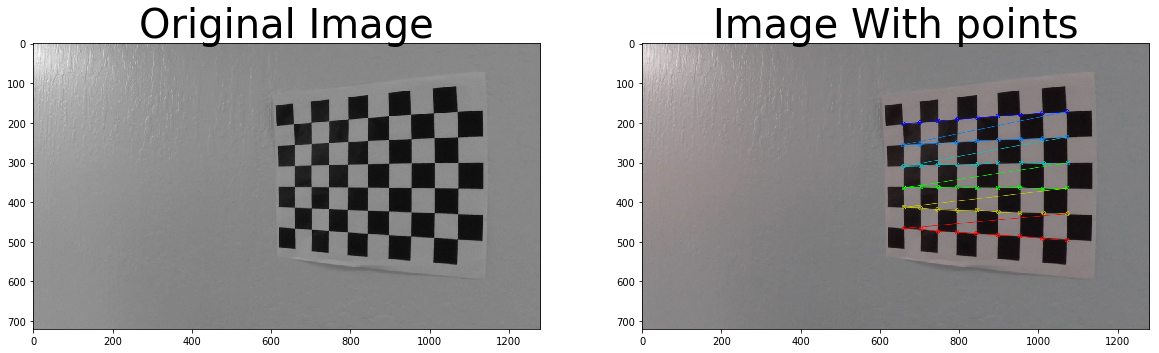

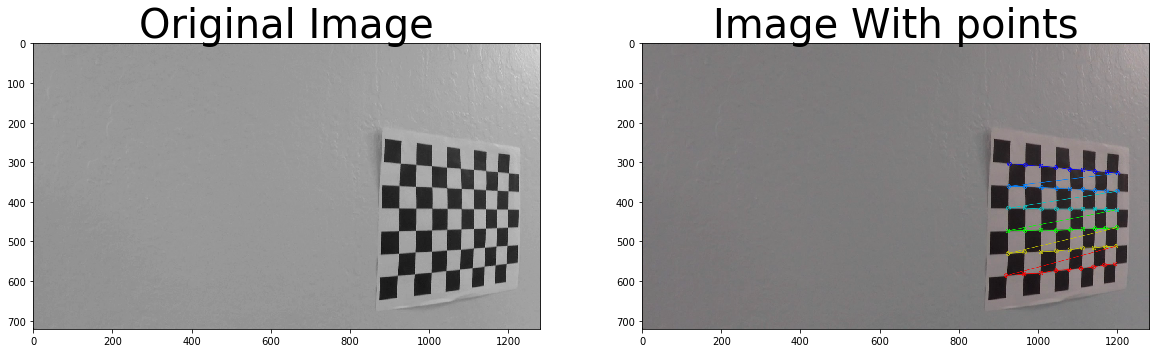

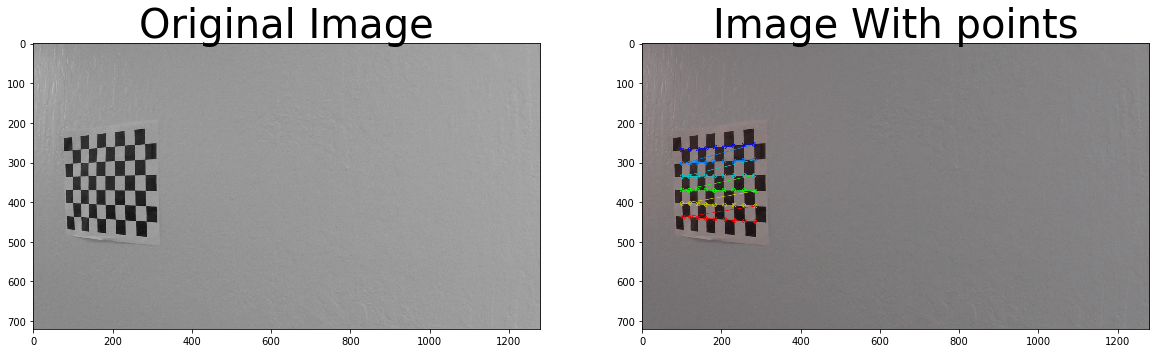

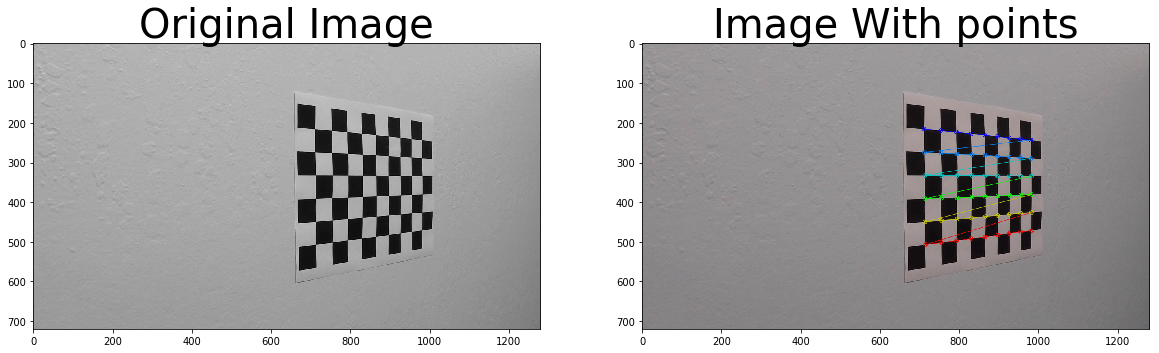

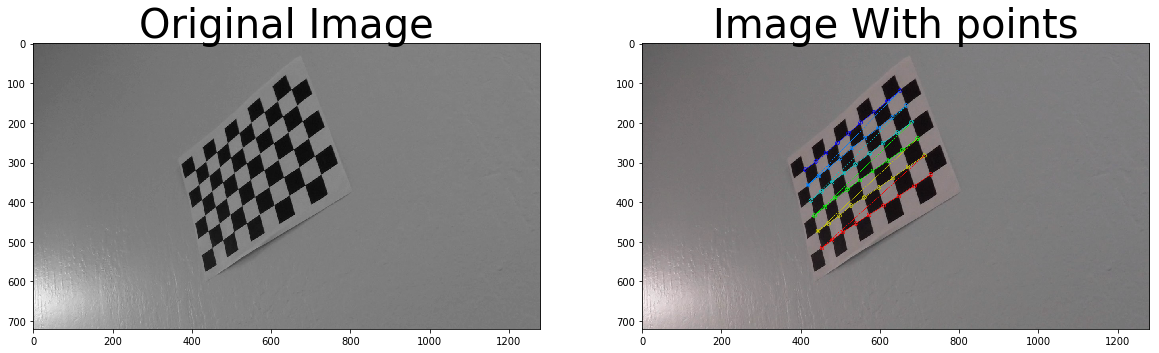

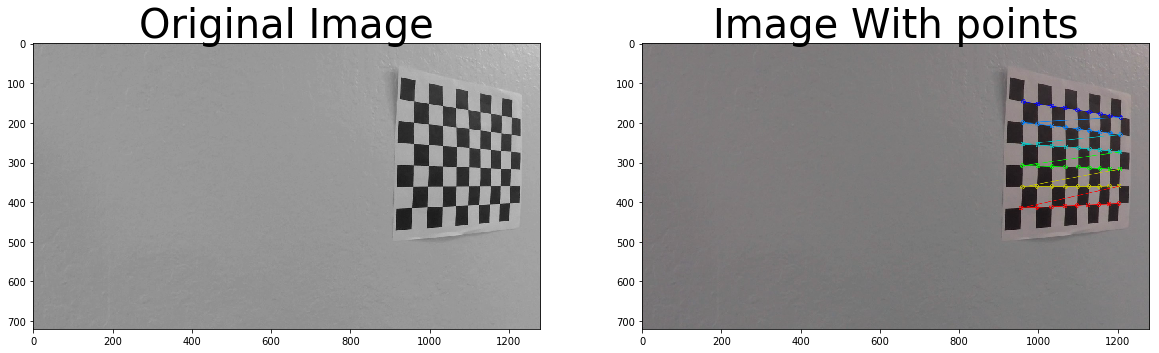

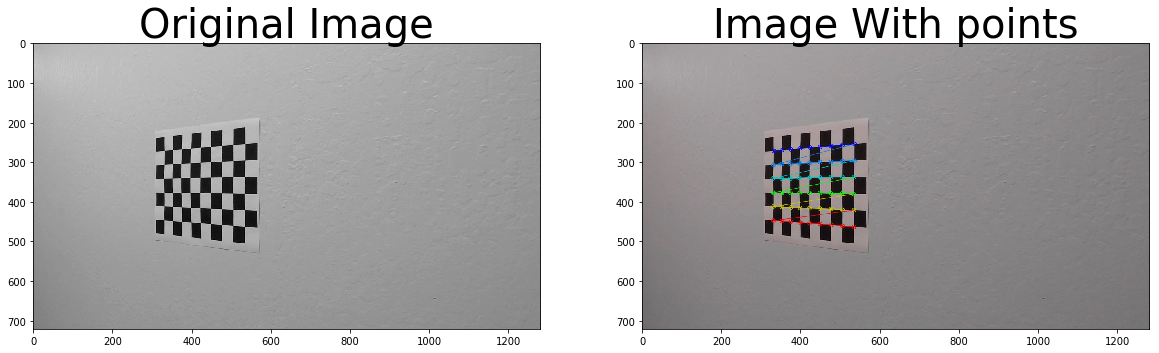

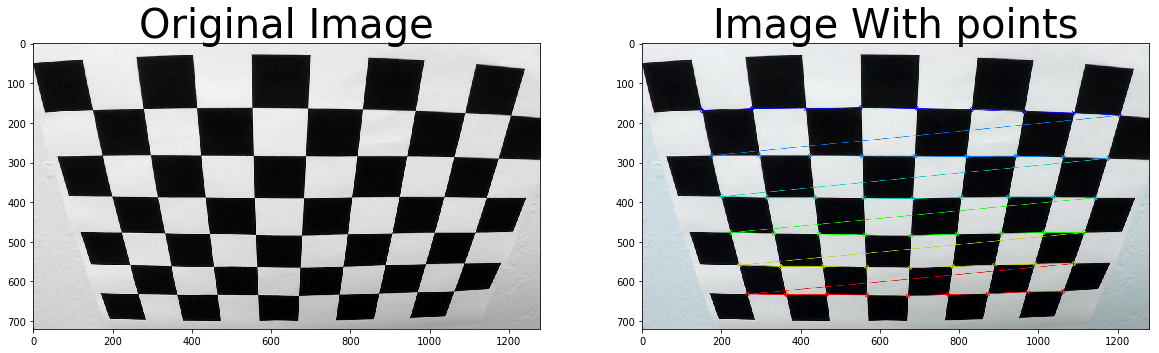

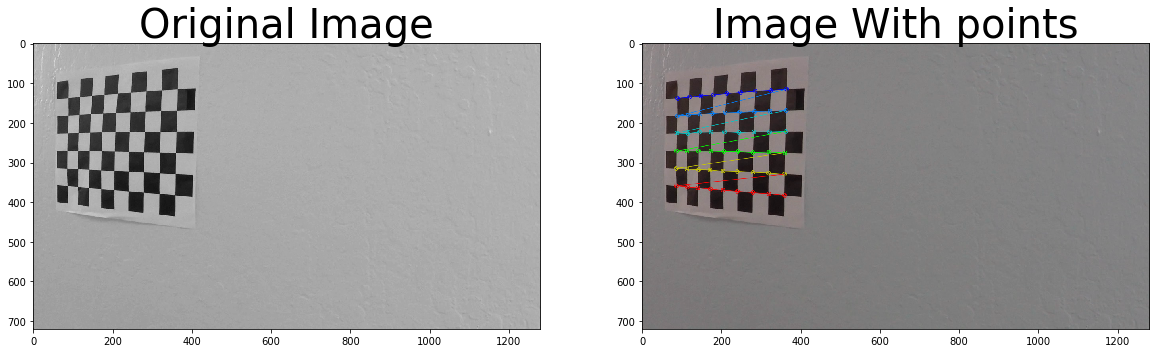

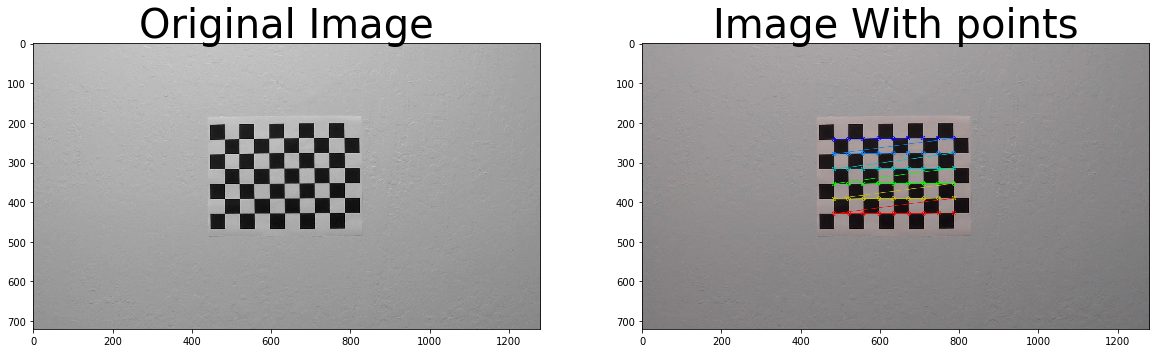

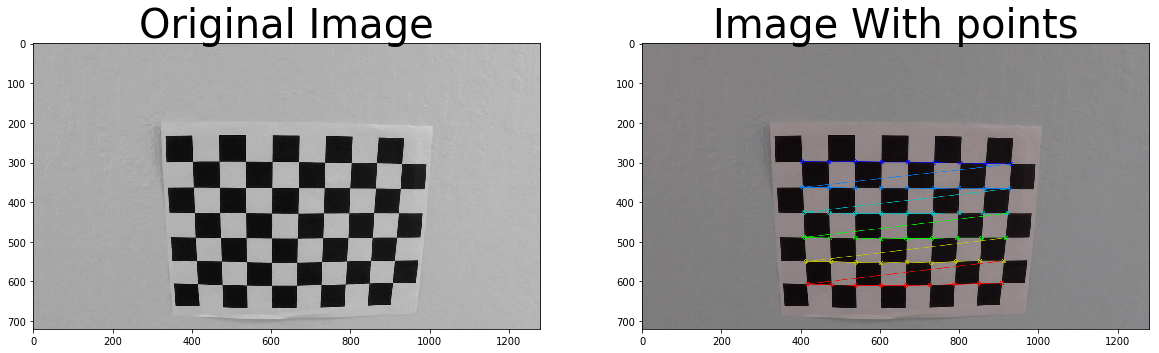

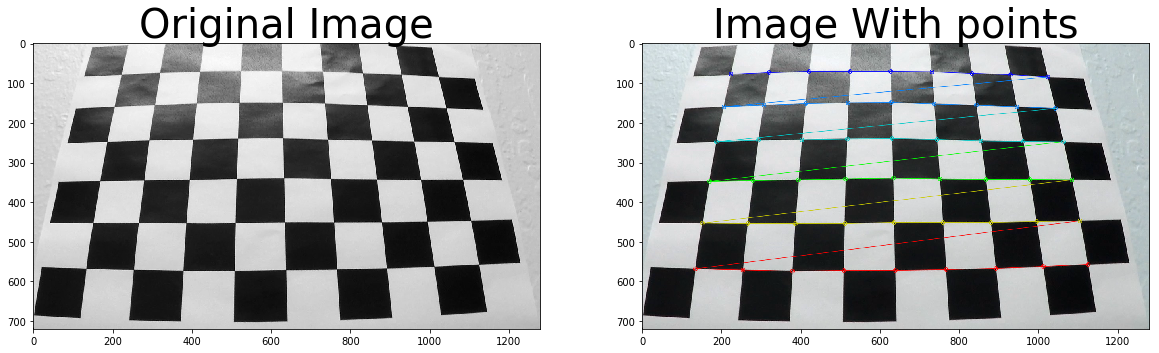

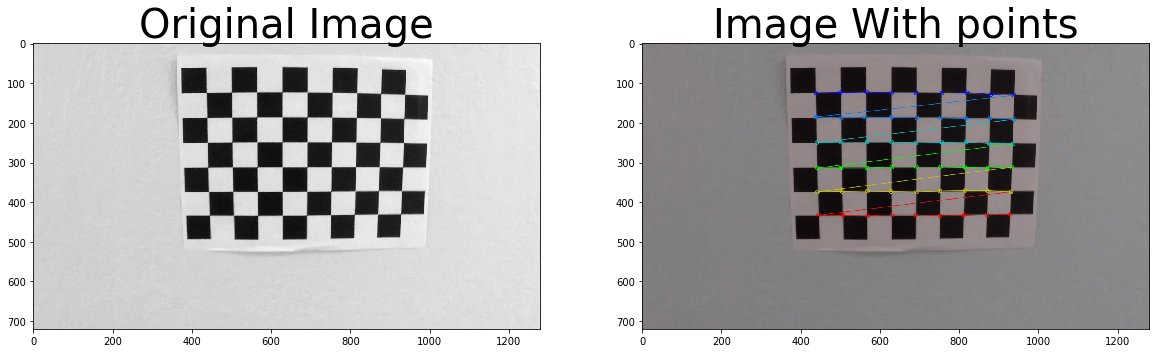

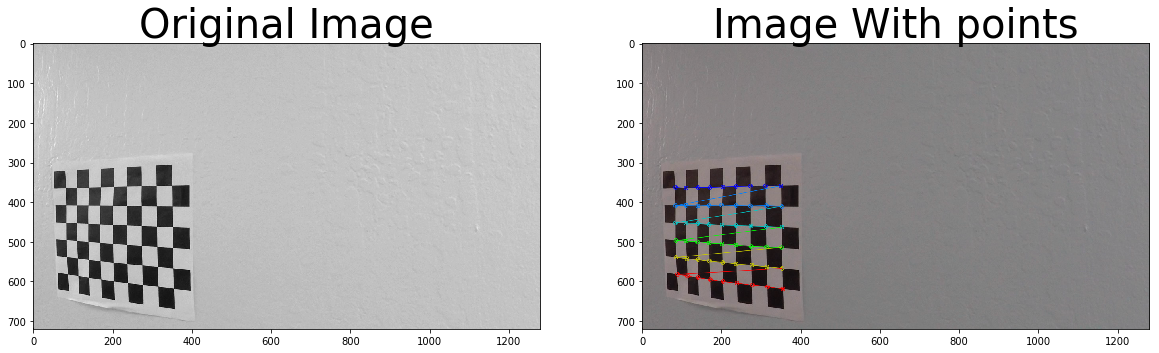

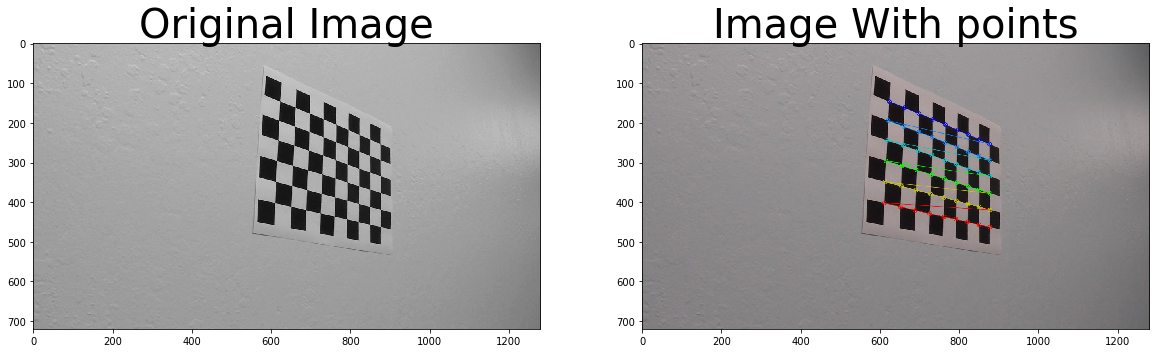

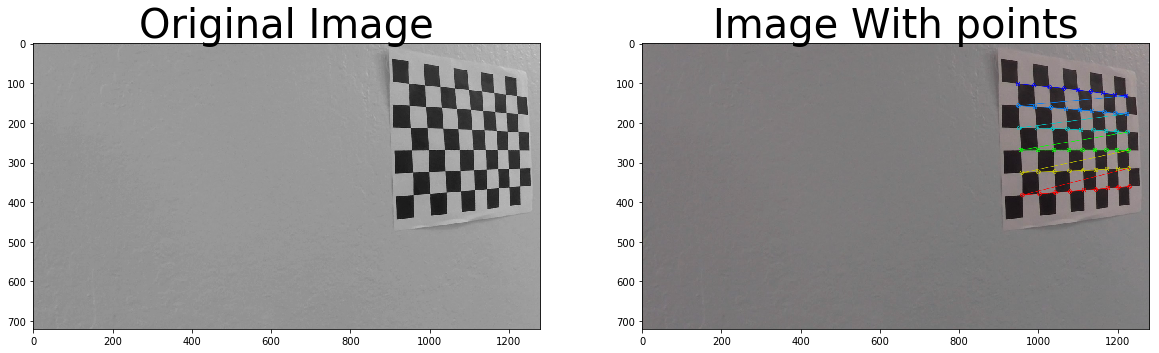

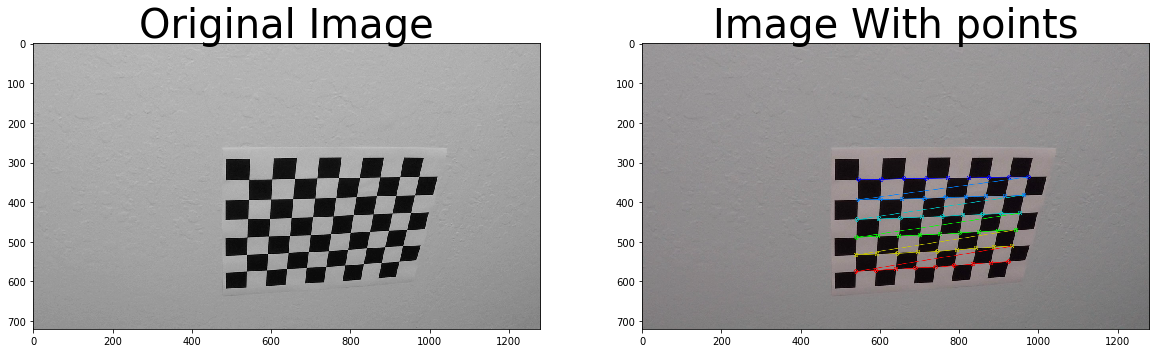

In [4]:
def calibrateCamera(useCalibrationCache=True, saveToFile=True):
    
    calibrationFileResults = "./camera_cal/camera_calibration_results.p"
    # Return mtx, dist of already calibrated camera
    if useCalibrationCache is True:
        if os.path.exists(calibrationFileResults):
            print()
            print("Using already available cached calibration results.")
            print()
            ret, mtx, dist, rvecs, tvecs = pickle.load(open(calibrationFileResults, "rb" ))
            return mtx, dist
    
    # Udacity provided 9x6 chessboard images
    nx = 9
    ny = 6

    pathCalibImages = './camera_cal/'
    imageNames = glob.glob(os.path.join(pathCalibImages, 'calibration*.jpg'))

    listImages = []
    for imageName in imageNames:
        listImages.append(cv2.imread(imageName))

    # 3D real-world points and the corresponding 2D image points
    objpoints, imgpoints = [], []

    # 3D points
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

    gray = None
    for idx, img in enumerate(listImages):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        print("Finding corners in calibration image {}".format(idx))
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        
        # Check if the specified number i.e. 9x6 of chessboard corners is found
        if ret == True:
            print("... found")

            # Draw and display the corners
            imageOrig = []
            imageOrig = img.copy()
            img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            
            fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
            axes[0].imshow(gray, cmap='gray')
            axes[0].set_title('Original Image', fontsize=40)
            axes[1].imshow(img, cmap='gray')
            axes[1].set_title('Image With points', fontsize=40)
            
            objpoints.append(objp)
            imgpoints.append(corners)                
        else:
            print(" ... NOT found")

        print()

    print("Calibrating camera ...")
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    if saveToFile is True:
        pickle.dump([ret, mtx, dist, rvecs, tvecs], open(calibrationFileResults, "wb"))
    
    return mtx, dist


calibrateCamera(useCalibrationCache=False) 

## Step 3: Apply a distortion correction to raw images 

In [5]:
def undistortImage(img, mtx, dist, plotImages=True):
    imageUndistorted = cv2.undistort(img, mtx, dist, None, mtx)
    
    if plotImages is True:
        f2, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f2.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=40)
        ax2.imshow(imageUndistorted)
        ax2.set_title('Undistorted Image', fontsize=40)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
    return imageUndistorted


Using already available cached calibration results.

camera matrix: [[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]

distortion coefficients: [[ -2.41017956e-01  -5.30721173e-02  -1.15810355e-03  -1.28318856e-04
    2.67125290e-02]]


True

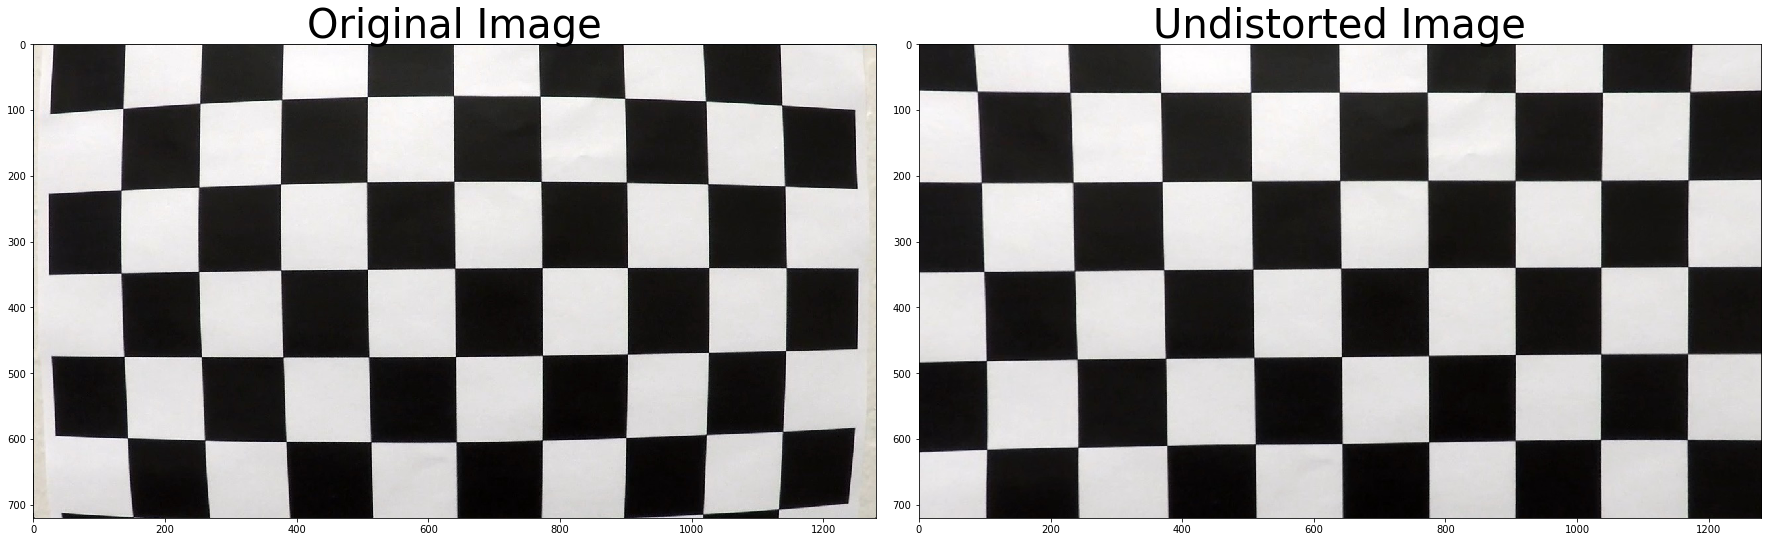

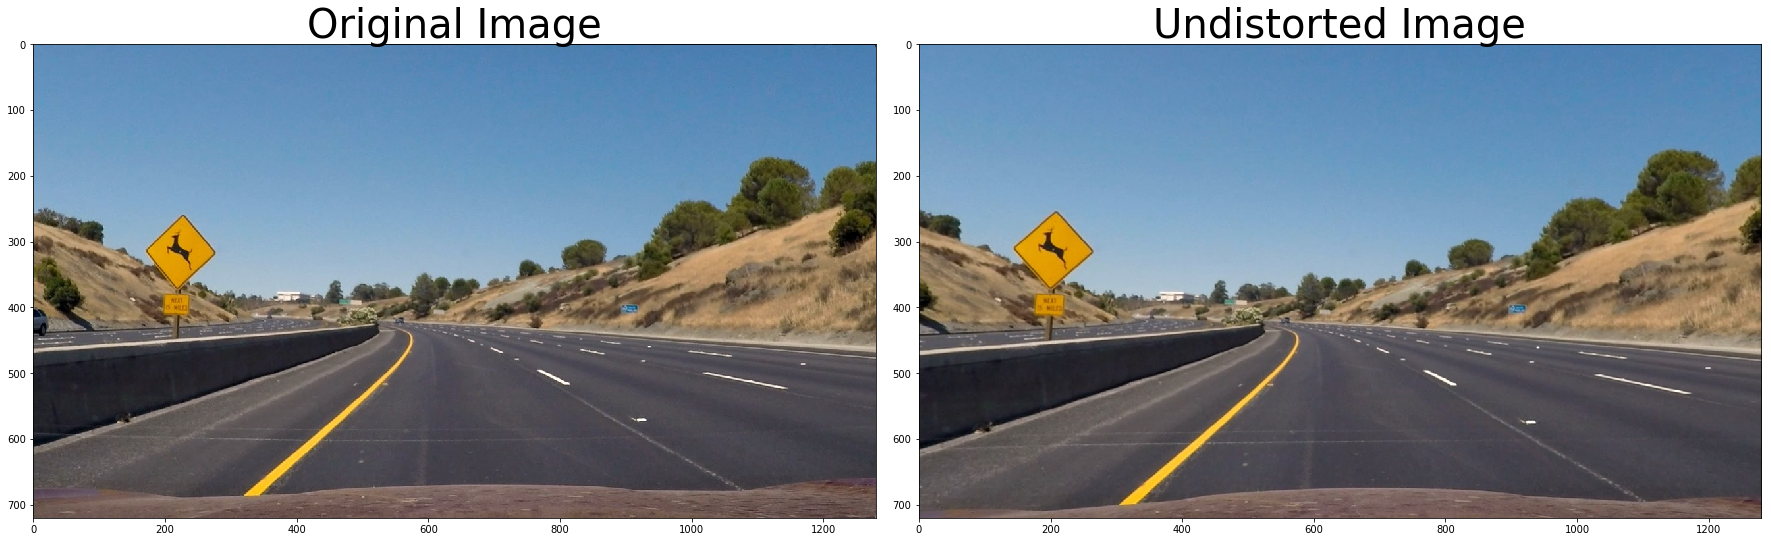

In [6]:
mtx, dist = calibrateCamera(useCalibrationCache=True)
print("camera matrix: {}".format(mtx))
print()
print("distortion coefficients: {}".format(dist))

# Undistort a calibration image
imageCalib = cv2.cvtColor(cv2.imread('./camera_cal/calibration1.jpg'), cv2.COLOR_BGR2RGB)
imageCalibUndistorted = undistortImage(imageCalib, mtx, dist, plotImages=True)

cv2.imwrite('output_images/img_distorted_calib.jpg', imageCalib)
cv2.imwrite('output_images/img_undistorted_calib.jpg', imageCalibUndistorted)

# Undistort a test image
imageTest = cv2.cvtColor(cv2.imread('./test_images/test2.jpg'), cv2.COLOR_BGR2RGB)
imageTestUndistorted = undistortImage(imageTest, mtx, dist, plotImages=True)

cv2.imwrite('output_images/img_distorted_test.jpg', imageTest)
cv2.imwrite('output_images/img_undistorted_test.jpg', imageTestUndistorted)
